<a href="https://colab.research.google.com/github/PDBe-KB/sifts_data_analysis/blob/main/sifts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retriving SIFTS annotations from PDBx/mmCIF file of any PDB entry

## Install third-party library

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!pip install gemmi
!pip install biotite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 8.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 MB 11.5 MB/s eta 0:00:00


## Retrive the updated PDBx/mmCIF file from PDBe

Loading the updated PDB mmCIF file from PDBe URL.
For e.g., for PDB 1cbs, you can retrive the updated PDBx/mmCIF file from  link [https://www.ebi.ac.uk/pdbe/entry-files/1cbs_updated.cif](https://www.ebi.ac.uk/pdbe/entry-files/1cbs_updated.cif)

The function `get_updated_mmcif` takes a PDB id as an input and gets the updated PDBx/mmCIF file from a PDBe URL and stores its contents in a string format.

In [ ]:
import requests


def get_updated_mmcif(my_pdb) :
  '''
  This function takes a PDB id as an input.
  It gets the updated PDBX/mmCIF file from PDBe URL and
  stores the contents of the updated PDBx/mmCIF file in a text format.
  '''
  url = f"https://www.ebi.ac.uk/pdbe/entry-files/{my_pdb}_updated.cif"   
  response = requests.get(url) 
  return response.text

# write the PDB id here
pdb = "4o0r"
# get updated PDBx/mmCIF file for that PDB
pdb_mmcif = get_updated_mmcif(pdb)


## Parse the updated PDBx/mmCIF using gemmi
Reading the PDB mmCIF file using gemmi.

The function `cif.read_string` reads the contents of the PDBx/mmCIF file from a string.

The function `read_mmcif_category` parse the given string with PDBx/mmCIF file content and reads any the given mmcif category and stores its data in a pandas dataframe. This dataframe is then displayed in the tabular format.



In [ ]:
from gemmi import cif
import pandas as pd
from google.colab import data_table


def read_mmcif_category(my_block, my_cat) :
  """
  Takes two inputs- 1) the PDBx/mmCIF block and 2) PDBx/mmCIF category for which annotations needs to be retrived
  gives output- A pandas dataframe with all the annotations which is then shown in a tabular format.
  """
  my_cat = my_block.get_mmcif_category(my_cat)
  data = pd.DataFrame(my_cat)
  data_table.enable_dataframe_formatter()
  return data


# Read the given PDBx/mmCIF string and returns a document containing blocks
doc = cif.read_string(pdb_mmcif)
# Get the only block; throws exception if the document has more blocks. Block contain name-value pairs ie mmCIF categories and their respective data items.
block = doc.sole_block()



### Get uniprot segment-wise annotation

Reading the "_pdbx_sifts_unp_segments" category to retrive segments/regions of PDB residues mapped to the canonical UniProt accession and all its isoforms. The pandas dataframe displayed in the tabular format has following key features: 
* Users can filter the results using <button>Filter</button>  of the right hand side of this table.
* Clicking on any column title lets users sort the results according to that column's value. 
* The table displays only a subset of the data at a time. Users can navigate through pages of data using the controls on the lower right.
* Users can copy the table in CSV, JSON or Markdown format using Copy table button. 


In [ ]:
read_mmcif_category(block,"_pdbx_sifts_unp_segments")

,entity_id,asym_id,unp_acc,segment_id,instance_id,unp_start,unp_end,seq_id_start,seq_id_end,best_mapping,identity
0,1,A,Q13153,1,1,249,545,1,297,y,0.99
1,1,B,Q13153,1,1,249,545,1,297,y,0.99


### Get segment-wise annotations for additional databases

Reading the "_pdbx_sifts_xref_db_segments" category to retrive segments/regions of PDB residues mapped to additional databases such as  Pfam, SCOP2, and CATH.  
All the annotations is represented in a tabular format which can be filtered, sorted or downloaded in various formats as mentioned earlier.



In [ ]:
read_mmcif_category(block,"_pdbx_sifts_xref_db_segments")


,entity_id,asym_id,xref_db,xref_db_acc,domain_name,segment_id,instance_id,seq_id_start,seq_id_end
0,1,A,CATH,1.10.510.10,4o0rA02,1,1,99,293
1,1,A,CATH,3.30.200.20,4o0rA01,1,1,1,98
2,1,A,SCOP2B,8034489,SF,1,1,1,293
3,1,A,Pfam,PF00069,None,1,1,22,273
4,1,B,CATH,1.10.510.10,4o0rB02,1,1,99,294
5,1,B,CATH,3.30.200.20,4o0rB01,1,1,1,98
6,1,B,SCOP2B,8034489,SF,1,1,1,293
7,1,B,Pfam,PF00069,None,1,1,22,273


### Get residue-wise annotations for UniProt and additional databases

Reading the "_pdbx_sifts_xref_db" category to retrive annotations specific to the best mapped UniProt accession and identify all the mappings for each individual residue to  external databases.
 

In [ ]:
a = read_mmcif_category(block,"_pdbx_sifts_xref_db")
a


,entity_id,asym_id,seq_id_ordinal,seq_id,mon_id,mon_id_one_letter_code,unp_res,unp_num,unp_acc,unp_segment_id,unp_instance_id,res_type,observed,mh_id,xref_db_name,xref_db_acc,xref_domain_name,xref_db_segment_id,xref_db_instance_id
0,1,A,1,1,SER,S,S,249,Q13153,1,1,None,y,1,CATH,3.30.200.20,4o0rA01,1,1
1,1,A,2,1,SER,S,S,249,Q13153,1,1,None,y,1,SCOP2,8034489,SCOP2B-SF,1,1
2,1,A,1,2,ASP,D,D,250,Q13153,1,1,None,y,1,CATH,3.30.200.20,4o0rA01,1,1
3,1,A,2,2,ASP,D,D,250,Q13153,1,1,None,y,1,SCOP2,8034489,SCOP2B-SF,1,1
4,1,A,1,3,GLU,E,E,251,Q13153,1,1,None,y,1,CATH,3.30.200.20,4o0rA01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,1,B,2,293,THR,T,T,541,Q13153,1,1,None,y,1,SCOP2,8034489,SCOP2B-SF,1,1
1680,1,B,1,294,LYS,K,K,542,Q13153,1,1,None,y,1,CATH,1.10.510.10,4o0rB02,1,1
1681,1,B,1,295,ASN,N,N,543,Q13153,1,1,None,n,1,None,None,None,None,None
1682,1,B,1,296,ASN,N,N,544,Q13153,1,1,None,n,1,None,None,None,None,None


### Map Author residue numbering to other residue numbering schemes

There are two different numbering schemes followed to indicate each residue (amino-acid or nucleotide) in the PDBx/mmCIF file.


1.   “auth_seq_id” which is the numbering provided by the author. Author can assign its value in any desired way and the values may be used to relate the given structure to a numbering scheme in a homologous structure, including sequence gaps or insertion codes, which are not necessarily numbers.
2.  “label_seq_id '' which is the wwPDB assigned numbering which starts from 1 and increments sequentially for all the polymer residues.

All the SIFTS-specific categories refer consistently to the wwPDB assigned numbering scheme defined by the “label_seq_id” data item in the atom_site category. The reference to label_seq_id is provided by the data items “.seq_id”, “.seq_id_start” and “.seq_id_end” in the relevant categories.


Here, we show how to retrive data on the author provided or the PDB numbering scheme.

In [ ]:
# use the relationship for "label_seq_id" and other residue numbering data items from "_pdbx_poly_seq_scheme" category
b = read_mmcif_category(block,"_pdbx_poly_seq_scheme")

b

,asym_id,entity_id,seq_id,mon_id,ndb_seq_num,pdb_seq_num,auth_seq_num,pdb_mon_id,auth_mon_id,pdb_strand_id,pdb_ins_code,hetero
0,A,1,1,SER,1,249,249,SER,SER,A,False,n
1,A,1,2,ASP,2,250,250,ASP,ASP,A,False,n
2,A,1,3,GLU,3,251,251,GLU,GLU,A,False,n
3,A,1,4,GLU,4,252,252,GLU,GLU,A,False,n
4,A,1,5,ILE,5,253,253,ILE,ILE,A,False,n
...,...,...,...,...,...,...,...,...,...,...,...,...
595,B,1,296,ASN,296,544,None,None,None,B,False,n
596,B,1,297,HIS,297,545,None,None,None,B,False,n
597,B,1,298,GLY,298,546,None,None,None,B,False,n
598,B,1,299,ASN,299,547,None,None,None,B,False,n


In [ ]:
# merge the data items from "_pdbx_poly_seq_scheme" and "_pdbx_sifts_xref_db"
columns_to_merge = ["entity_id","asym_id","seq_id","pdb_seq_num","auth_seq_num","pdb_ins_code"]
c = a.merge(b[columns_to_merge])
columns_to_display = ["entity_id","asym_id","seq_id_ordinal","seq_id","mon_id","auth_seq_num","pdb_ins_code","unp_acc","unp_num","observed","xref_db_name","xref_db_acc","xref_domain_name"]
c[columns_to_display]

,entity_id,asym_id,seq_id_ordinal,seq_id,mon_id,auth_seq_num,pdb_ins_code,unp_acc,unp_num,observed,xref_db_name,xref_db_acc,xref_domain_name
0,1,A,1,1,SER,249,False,Q13153,249,y,CATH,3.30.200.20,4o0rA01
1,1,A,2,1,SER,249,False,Q13153,249,y,SCOP2,8034489,SCOP2B-SF
2,1,A,1,2,ASP,250,False,Q13153,250,y,CATH,3.30.200.20,4o0rA01
3,1,A,2,2,ASP,250,False,Q13153,250,y,SCOP2,8034489,SCOP2B-SF
4,1,A,1,3,GLU,251,False,Q13153,251,y,CATH,3.30.200.20,4o0rA01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,1,B,2,293,THR,541,False,Q13153,541,y,SCOP2,8034489,SCOP2B-SF
1680,1,B,1,294,LYS,542,False,Q13153,542,y,CATH,1.10.510.10,4o0rB02
1681,1,B,1,295,ASN,None,False,Q13153,543,n,None,None,None
1682,1,B,1,296,ASN,None,False,Q13153,544,n,None,None,None


# Comparing equivalent residues of different PDB structures from same protein

### Example 1: Protein Tyrosine Phosphatase 1B

Here we compare the residue numbering of the unbound and bound forms of human PTP1B protein. This protein is known to be a signalling molecule regulating  a variety of cellular processes including cell growth, differentiation and oncogenic transformation and is a potential therapeutic target for treatment of type 2 diabetes and cancer. Upon substrate/inhibitor binding, the WPD loop transitions from an open to a closed conformation.

*   Protein name: Protein Tyrosine Phosphatase 1B
*   UniProt accession: P18031
*   Unbound PDB structures: 2HNP and 1PTY
*   Inhibitor bound PDB structures: 3CWE and 1Q6P
*   WPD loop residue: Tryptophan 179 















Get the updated mmcif files for all the PDB structures and get the residue-wise annotations for each structure using '_pdbx_sifts_xref_db' category.

In [ ]:
# list the PDB structures for which you would like to compare equivalent residues are in pdb_list
pdb_list = ["2hnp","1pty","3cwe","1q6p"]
all_df= pd.DataFrame()
# for each PDB structure in the given list, get the updated mmcif data, parse it and store in pandas dataframe to visualise it in tabular format
for pdb in pdb_list:
  pdb_mmcif = get_updated_mmcif(pdb)
  doc=cif.read_string(pdb_mmcif)
  block = doc.sole_block()
  df = read_mmcif_category(block,"_pdbx_sifts_xref_db")
  df = df[['asym_id', 'seq_id','mon_id_one_letter_code','unp_res','unp_num','unp_acc']]
  df.insert(0, 'pdb_id', pdb)
  df2 = read_mmcif_category(block,"_pdbx_poly_seq_scheme")
  df3= df.merge(df2[["entity_id","asym_id","seq_id","pdb_seq_num","auth_seq_num","pdb_ins_code"]])
  all_df = all_df.append(df3) 

all_df


,pdb_id,asym_id,seq_id,mon_id_one_letter_code,unp_res,unp_num,unp_acc,entity_id,pdb_seq_num,auth_seq_num,pdb_ins_code
0,2hnp,A,1,M,M,1,P18031,1,1,None,False
1,2hnp,A,2,E,E,2,P18031,1,2,None,False
2,2hnp,A,3,M,M,3,P18031,1,3,None,False
3,2hnp,A,4,E,E,4,P18031,1,4,None,False
4,2hnp,A,5,K,K,5,P18031,1,5,5,False
...,...,...,...,...,...,...,...,...,...,...,...
1637,1q6p,B,306,L,L,294,P18031,1,1294,None,False
1638,1q6p,B,307,S,S,295,P18031,1,1295,None,False
1639,1q6p,B,308,H,H,296,P18031,1,1296,None,False
1640,1q6p,B,309,E,E,297,P18031,1,1297,None,False


Group the data based on UniProt number and then filter the results for a given UniProt residue.

Here, we filter the results for the first residue in WPD loop - residue number 179.

In [ ]:

# GROUP BY UNP_ACC and UNP_NUM
df3 = all_df.groupby(['unp_num'])
data_table.enable_dataframe_formatter()
# Select the UniProt residue number ("unp_num") which you would like to compare across different PDB structures
unp_res = '179'
df3.get_group(unp_res).drop_duplicates()


,pdb_id,asym_id,seq_id,mon_id_one_letter_code,unp_res,unp_num,unp_acc,entity_id,pdb_seq_num,auth_seq_num,pdb_ins_code
491,2hnp,A,179,W,W,179,P18031,1,179,179,False
494,1pty,A,179,W,W,179,P18031,1,179,179,False
501,3cwe,A,186,W,W,179,P18031,1,679,679,False
498,1q6p,A,191,W,W,179,P18031,1,679,679,False
1319,1q6p,B,191,W,W,179,P18031,1,1179,1179,False


It should be noted that, residue W179  from PDB 3CWE and other residues in inhibitor bound PDBs 3CWE and 1Q6P  have different author numbering compared to the unbound/substrate bound form (PDB 2HNP/1PTY). Thus, the UniProt numbering in the updated PDBx/mmCIF file provides a common reference frame for residue correspondence. 

## Example 2: p21-activated kinase (PAK1)



Get all the PDB structures for a given UniProt accession

The function `get_pdb_str` retrives all the PDB structures mapped by SIFTS for a given UniProt accession using PDBe API call [https://www.ebi.ac.uk/pdbe/graph-api/uniprot/:accession]("https://www.ebi.ac.uk/pdbe/graph-api/uniprot/:accession). 

In this example, we retrive all the PDB structures for Human PAK1 enzyme whose UniProt accession is Q13153.
See: https://www.ebi.ac.uk/pdbe/pdbe-kb/proteins/Q13153

In [ ]:
import pandas as pd


def get_pdb_str(my_accession) :
  """
  Get the list of all the PDB structures for a given UniProt accession
  """
  url=f"https://www.ebi.ac.uk/pdbe/graph-api/uniprot/{my_accession}"
  pdb_list = set()
  data_df = pd.read_json(url, lines=True)
  for data in data_df[accession] :
    for pdb in data['mappings'] :
        pdb_list.add(pdb['entry_id'])
  return pdb_list


accession = "Q13153"
all_str = get_pdb_str(accession)
print(f"Total {len(all_str)} PDB structures mapped to UniProt accession {accession}- {all_str}")

Total 31 PDB structures mapped to UniProt accession Q13153- {'5dew', '4zy6', '4zy5', '5kbq', '4zy4', '4p90', '2hy8', '4eqc', '1yhw', '3q53', '3q52', '4zji', '4zjj', '5dey', '1f3m', '5ime', '5kbr', '3fy0', '3dvp', '5dfp', '3fxz', '4o0r', '1zsg', '3q4z', '7vto', '2qme', '4zlo', '4o0t', '4daw', '1yhv', '6b16'}


p21-activated kinases (PAKs) play an important role in diverse cellular processes. Full activation of PAKs requires autophosphorylation of a critical threonine/serine located in the activation loop of the kinase domain. In PAK1 enzymes, phosphorylation of the unique threonine residue (Thr423 in human PAK1) is essential for full catalytic activity. This enzyme shows autophosphorylated in trans, meaning that in a dimer, one kinase molecule phosphorylates the other one. In the structure of the PAK1 dimer, the phosphorylation site, Thr423, in the activation loop of monomer B makes a direct hydrogen bond with key residues Asn389 and Lys391 in monomer A.

Here, we look at the seqeunce variation in activation loop (417-429), phosphorylation site 423 and active site residue 389/391 in different PDB structures of human PAK1 enzyme. 

In [ ]:
def get_pdb_seq(df, residue_range) :
  """
  This function gives the PDB sequence from a given protein segment.
  It takes the residue range i.e. start and end position of a protein (UniProt residue number) and returns PDB seqeunce for that protein segment using the information from '_pdbx_sifts_xref_db'.
  This function takes the dataframe from 'read_mmcif_category' function as an input
  """
  
  start_res, end_res = residue_range 
  sub_df = df[['entity_id', 'seq_id','mon_id_one_letter_code','unp_res','unp_num','unp_acc'] ].drop_duplicates()
  sub_df = sub_df.dropna()
  # converting the UniProt residue data type to integers
  sub_df['unp_num'] = sub_df['unp_num'].astype(int) 
  # selecting the subset of the dataframe for the given protein segment
  sub_df = sub_df[sub_df['unp_num'].between(start_res, end_res)]
  # Get the PDB sequence for a given protein segemet
  x=sub_df['mon_id_one_letter_code'].tolist()
  pdb_seq =''.join(x)
  return pdb_seq



In [ ]:
# list of PDB structures used for comparitive analysis
pdb_lists = ["3q4z", "4o0r", "4o0t","4p90", "4zlo", "4zy4", "4zy5", "4zy6", "4zji", "4zji", "4zjj"]

# defining activation loop residue range
activation_loop_segment = [417, 429]

my_col_names =  ['PDB', 'Activation loop', 'Catalytic site residue- UniProt residue 389','Catalytic site residue- UniProt residue 391','Phosphorylated residue- UniProt residue 423']
my_df= pd.DataFrame(columns=my_col_names)

all_df= pd.DataFrame()
for pdb in pdb_lists :
  pdb_mmcif = get_updated_mmcif(pdb)
  doc=cif.read_string(pdb_mmcif)
  block = doc.sole_block()
  df = read_mmcif_category(block,"_pdbx_sifts_xref_db")
  x = get_pdb_seq(df, activation_loop_segment)

  # Getting Catalytic residue 389 from monomer A 
  hrd_res_1 = df.loc[df['unp_num'].eq('389') & df['asym_id'].eq('A')]['mon_id_one_letter_code'].drop_duplicates().tolist()[0]
  # Getting Catalytic residue 391 from monomer A 
  hrd_res_2 = df.loc[df['unp_num'].eq('391') & df['asym_id'].eq('A')]['mon_id_one_letter_code'].drop_duplicates().tolist()[0]
  # Getting Phosphorylated residue 423 from monomer B 
  oh_res = df.loc[df['unp_num'].eq('423') & df['asym_id'].eq('B')]['mon_id_one_letter_code'].drop_duplicates().tolist()[0]

  df2 = pd.DataFrame([[pdb,x, hrd_res_1,hrd_res_2,oh_res]],columns=my_col_names)
  # Concatinating data for all the PDB entries in one dataframe/table
  my_df = pd.concat([my_df,df2])

  
data_table.enable_dataframe_formatter()
my_df
  


,PDB,Activation loop,Catalytic site residue- UniProt residue 389,Catalytic site residue- UniProt residue 391,Phosphorylated residue- UniProt residue 423
0,3q4z,EQSKRSTMVGTPY,N,K,T
0,4o0r,EQSKRSEMVGTPY,N,K,E
0,4o0t,EQSKRSEMVGTPY,N,K,E
0,4p90,EQSKRSEMVGTPY,N,K,E
0,4zlo,EQSKRSTMVGTPY,D,K,T
0,4zy4,EQSKRSTMVGTPY,N,K,T
0,4zy5,EQSKRSTMVGTPY,N,K,T
0,4zy6,EQSKRSTMVGTPY,N,K,T
0,4zji,EQSKRSTMVGTPY,D,K,T
0,4zji,EQSKRSTMVGTPY,D,K,T


To see the conservation of activation loop of human PAK-1 enzyme, we align and then create a sequence logo for the activation loop from all the different PDB structures analysed. 

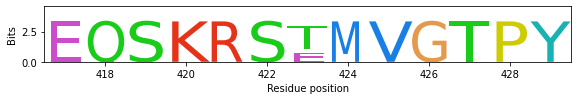

In [ ]:
import numpy as np
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


activation_loops= my_df["Activation loop"].tolist()
res_position = list(range(activation_loop_segment[0],activation_loop_segment[1]))

seqs = [seq.ProteinSequence(item) for item in activation_loops]

alignment = align.Alignment(
    sequences = seqs,
    trace     = np.tile(np.arange(len(seqs[0])), len(seqs)) \
                .reshape(len(seqs), len(seqs[0])) \
                .transpose(),
    score     = 0,

)


# Create sequence logo from alignment
fig = plt.figure(figsize=(8.0, 1.5))
ax = fig.add_subplot(111)

profile = seq.SequenceProfile.from_alignment(alignment)
# coloring based on Default color scheme of the ClustalX software
# change scheme to view in different coloring scheme, refer here https://www.biotite-python.org/examples/gallery/sequence/color_schemes_protein.html 
graphics.plot_sequence_logo(ax, profile, scheme="clustalx")


# Change the x-axis to match the residue numbering
scale_x = activation_loop_segment[0]-1
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x+scale_x))
ax.xaxis.set_major_formatter(ticks_x)

ax.set_xlabel("Residue position")
ax.set_ylabel("Bits")
# Remove the entire frame
fig.tight_layout()
plt.show()



Formation of a hydrogen bond between the substrate hydroxyl group of the Ser, Thr, or Tyr side chain and the catalytic aspartic acid residue side chain of the activation loop is a critical step in the mechanism of phosphorylation by protein kinases. Therefore, here we calculate the distances between hydroxyl oxygen atoms of Thr 423 of one monomer with the Asp 389 carboxylate atoms (Oδ1 and Oδ2) of the activation loop for the other monomer in the human PAK1 structure PDB 3Q4Z. 

In [ ]:
from scipy.spatial import distance

def process_df(my_df) :
  # convert the dataframe to list 
  a = my_df.values.tolist()[0]
  # convert the items to float type
  a = [float(item) for item in a] 
  return a

pdb = '3q4z'
pdb_mmcif = get_updated_mmcif(pdb)
doc=cif.read_string(pdb_mmcif)
block = doc.sole_block()
# Read the data from _atom_site category 
df = read_mmcif_category(block,"_atom_site")
# Select SIFTS PDB-UniProt mapping data along with atomic coordinates
df = df[['label_asym_id','label_seq_id','auth_comp_id','label_atom_id','pdbx_sifts_xref_db_name','pdbx_sifts_xref_db_acc','pdbx_sifts_xref_db_num','pdbx_sifts_xref_db_res','Cartn_x','Cartn_y','Cartn_z']].drop_duplicates()
# Get the coordinates for Phosphorylated residue 423 from monomer B 
q = df.loc[df['pdbx_sifts_xref_db_name'].eq('UNP') & df['pdbx_sifts_xref_db_num'].eq('423') & df['label_asym_id'].eq('B') &  df['label_atom_id'].eq('OG1')][['Cartn_x','Cartn_y','Cartn_z']]
# Get the coordinates for catalytic residue 389 from monomer A 
p = df.loc[df['pdbx_sifts_xref_db_name'].eq('UNP') & df['pdbx_sifts_xref_db_num'].eq('389') & df['label_asym_id'].eq('A') &  df['label_atom_id'].eq('OD1')][['Cartn_x','Cartn_y','Cartn_z']]
# convert the dataframe to list 
a = process_df(p)
b = process_df(q)
dist = round(distance.euclidean(a,b),2)
print(f"The distances between hydroxyl oxygen atom of Thr 423 of monomer A with the carboxylate atom of catalytic residue Asp 389 of monomer B in the human PAK1 structure PDB 3Q4Z is {dist} \u212B.")


The distances between hydroxyl oxygen atom of Thr 423 of monomer A with the carboxylate atom of catalytic residue Asp 389 of monomer B in the human PAK1 structure PDB 3Q4Z is 2.84 Å.
